<a href="https://colab.research.google.com/github/Tejas-1505/Insurance_cost_prediction/blob/main/INSURANCE_COST_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pickle

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [4]:
print("Dataset Information:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn Data Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())

Dataset Information:
Number of rows: 986
Number of columns: 11

Column Data Types:
Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

Summary Statistics:
              Age    Diabetes  BloodPressureProblems  AnyTransplants  \
count  986.000000  986.000000             986.000000      986.000000   
mean    41.745436    0.419878               0.468560        0.055781   
std     13.963371    0.493789               0.499264        0.229615   
min     18.000000    0.000000               0.000000        0.000000   
25%     30.000000    0.000000               0.000000        0.000000   
50%     42.000000    0.000000               0.000000        0.000000   
75%     53.0000

In [5]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


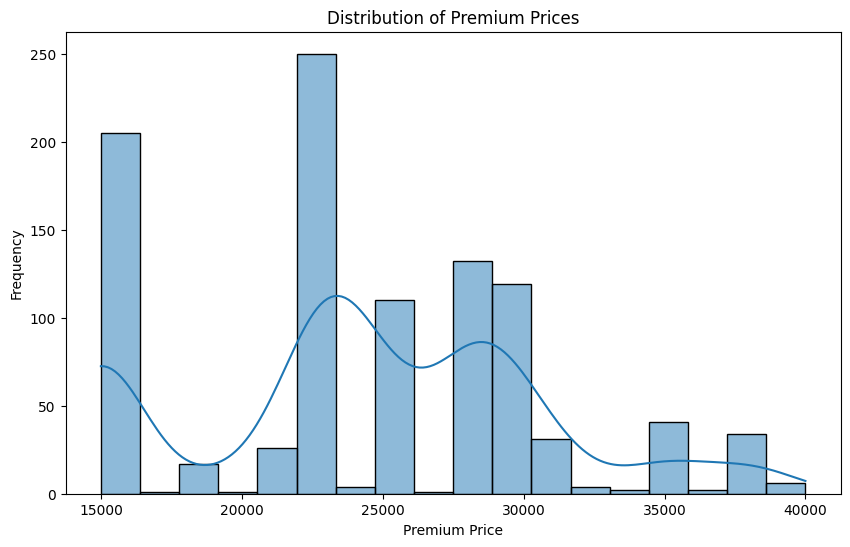

In [6]:
# 1. Distribution of Premium Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['PremiumPrice'], kde=True)
plt.title('Distribution of Premium Prices')
plt.xlabel('Premium Price')
plt.ylabel('Frequency')
plt.show()

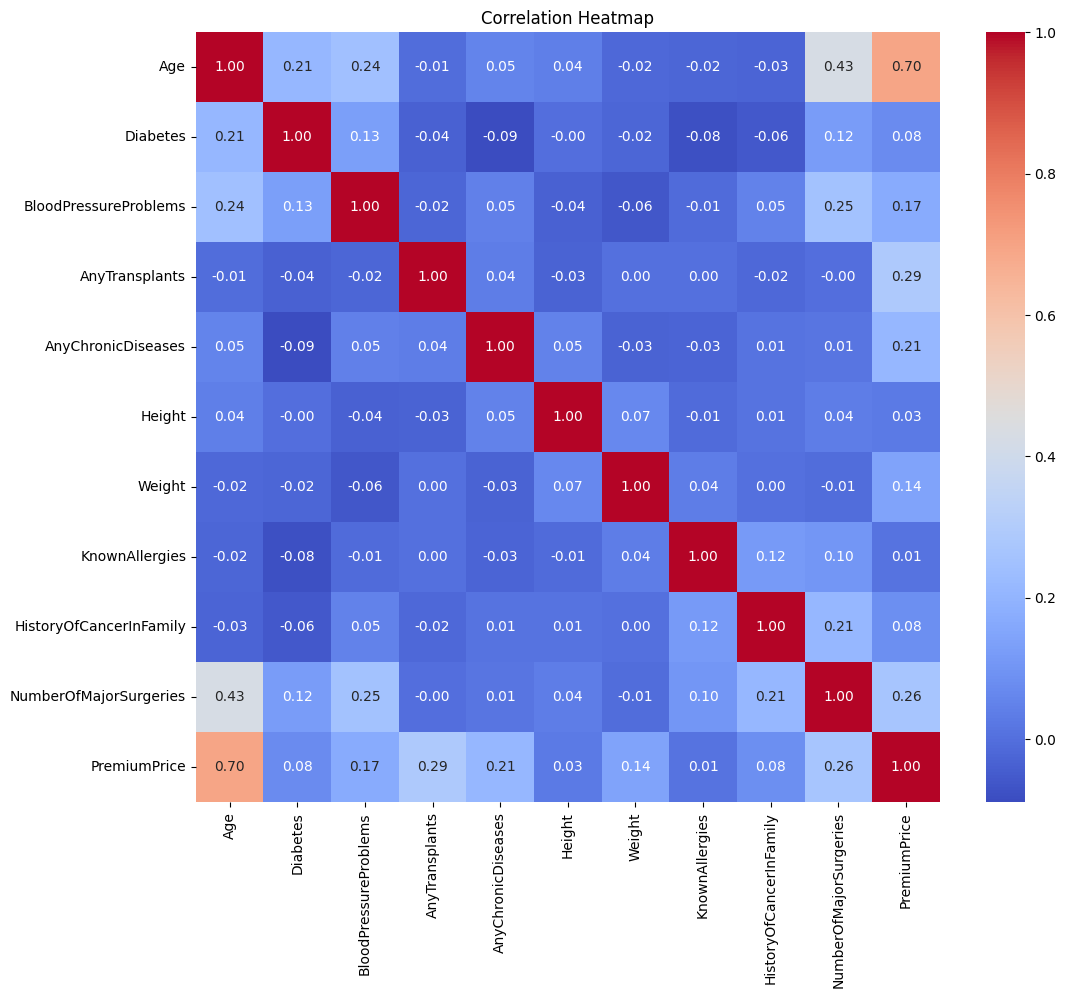

In [7]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


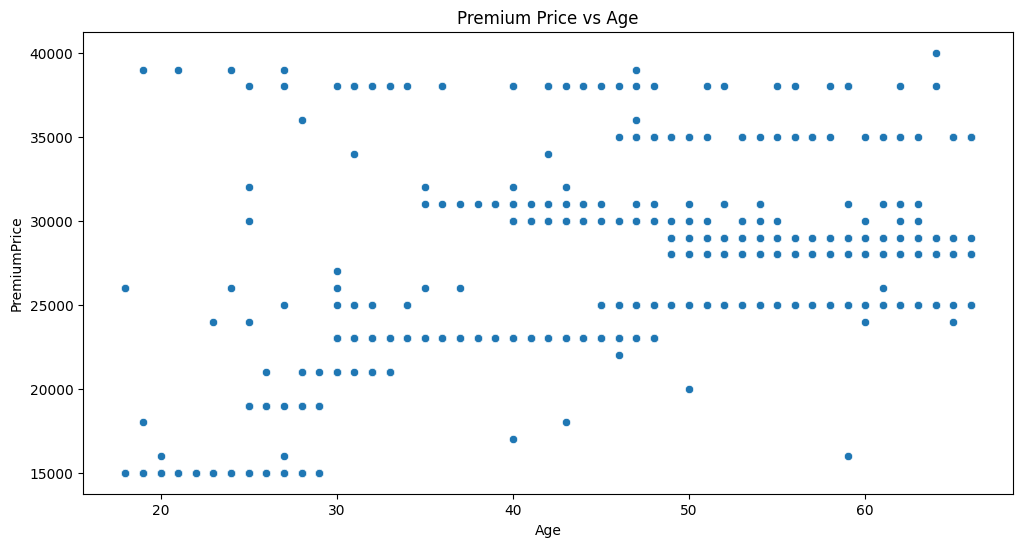

In [8]:
# 3. Premium Price by Age
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='PremiumPrice', data=df)
plt.title('Premium Price vs Age')
plt.show()

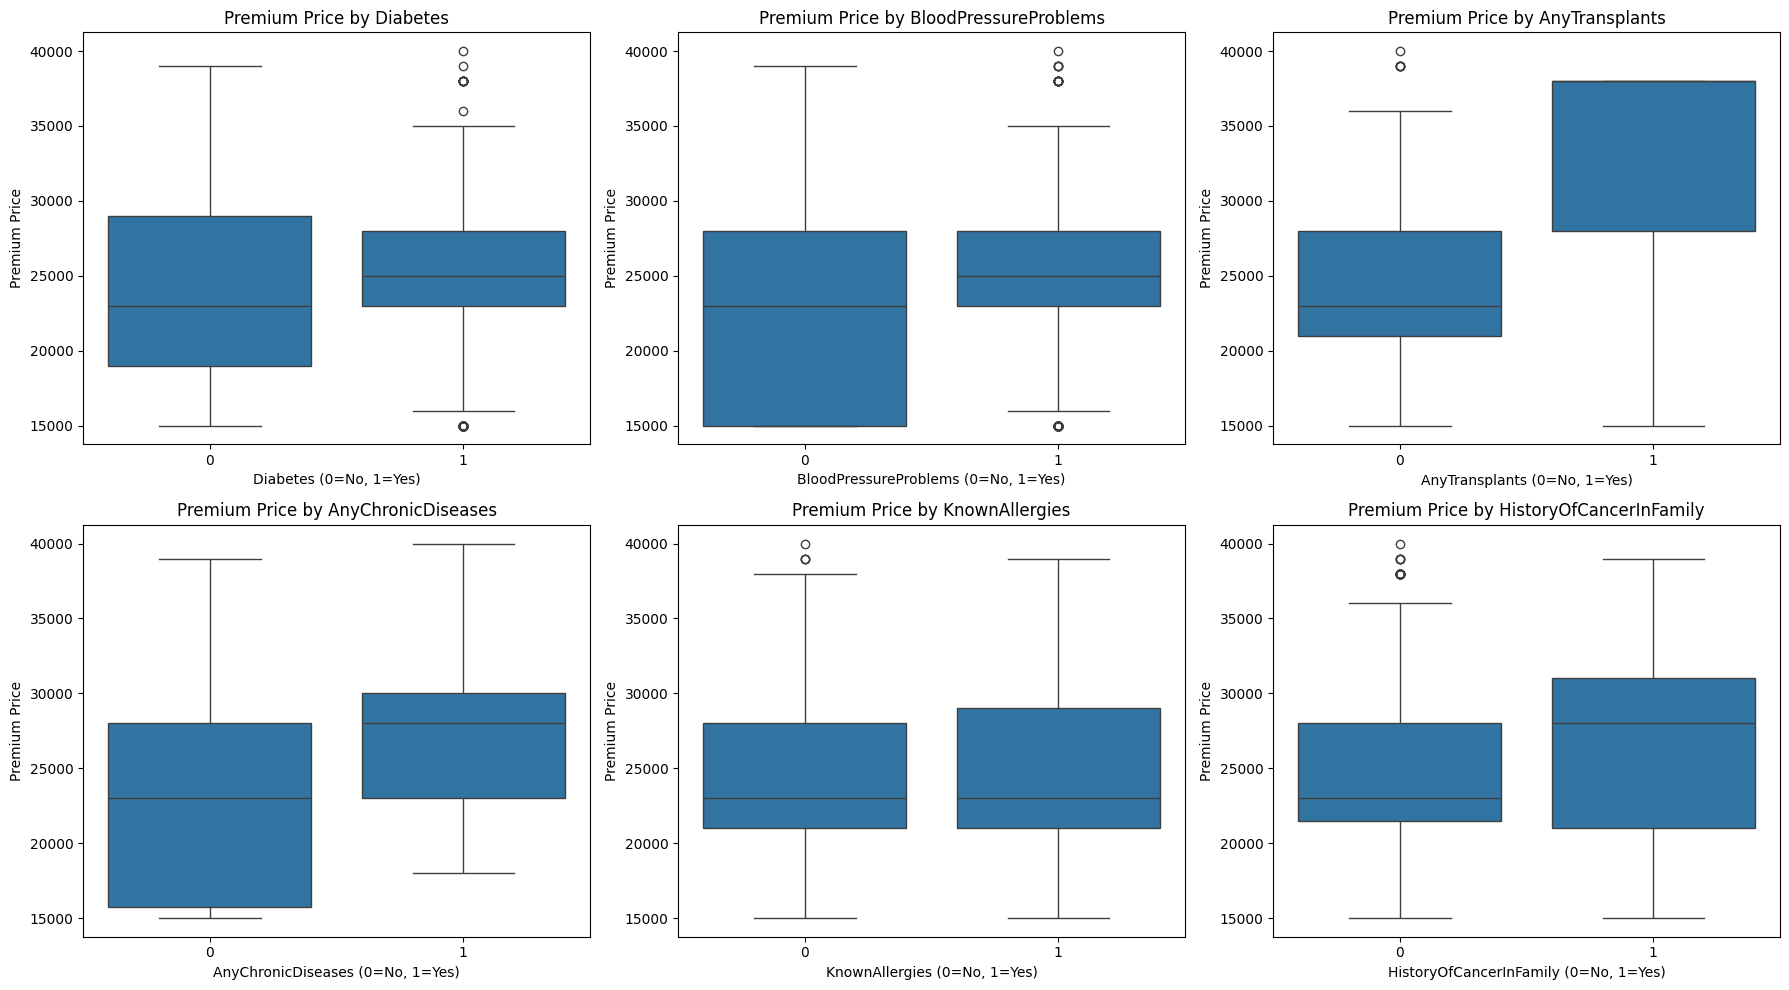

In [9]:
# 4. Premium Price by Health Conditions
health_conditions = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants',
                     'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, condition in enumerate(health_conditions):
    sns.boxplot(x=condition, y='PremiumPrice', data=df, ax=axes[i])
    axes[i].set_title(f'Premium Price by {condition}')
    axes[i].set_xlabel(f'{condition} (0=No, 1=Yes)')
    axes[i].set_ylabel('Premium Price')

plt.tight_layout()
plt.show()

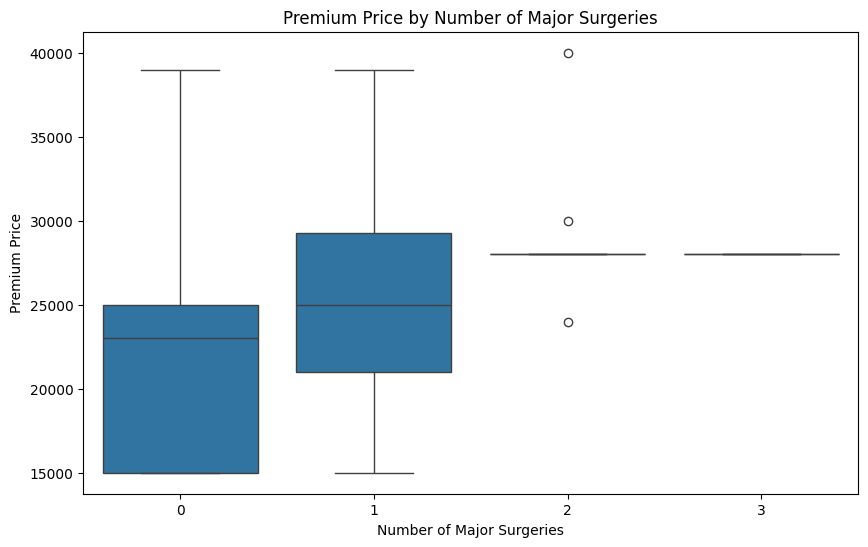

In [10]:
# 5. Premium Price by Number of Major Surgeries
plt.figure(figsize=(10, 6))
sns.boxplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=df)
plt.title('Premium Price by Number of Major Surgeries')
plt.xlabel('Number of Major Surgeries')
plt.ylabel('Premium Price')
plt.show()

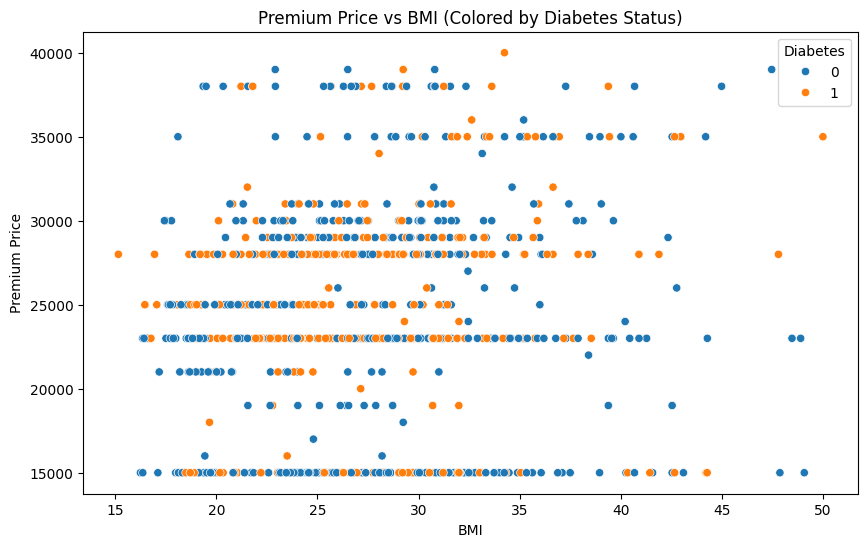

In [11]:
# 6. BMI Calculation and Analysis
df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='PremiumPrice', data=df, hue='Diabetes')
plt.title('Premium Price vs BMI (Colored by Diabetes Status)')
plt.xlabel('BMI')
plt.ylabel('Premium Price')
plt.show()

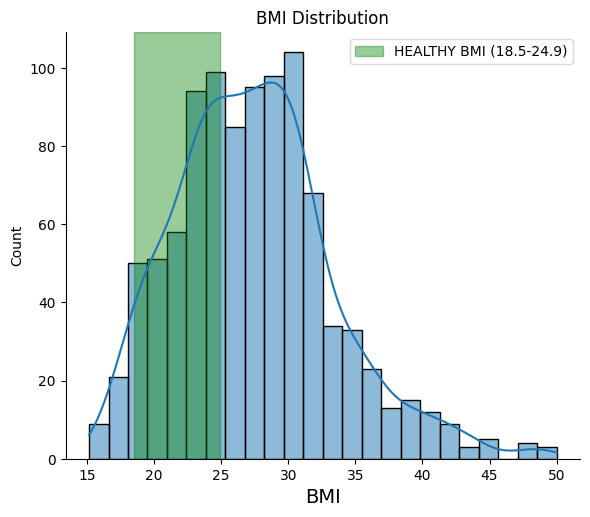

In [12]:
sns.displot(df, x = 'BMI', kde=True, aspect = 1.2)
plt.axvspan(18.5, 24.9, color = 'green', alpha =0.4, label = 'HEALTHY BMI (18.5-24.9)')
plt.xlabel('BMI', fontsize = 14)
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.legend()
plt.show()

In [13]:
healthy_bmi_count = len(df[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9)])
print(f"Number of individuals with healthy BMI: {healthy_bmi_count}")
total_count = df['BMI'].count()
print(f"Percentage with healthy BMI: {healthy_bmi_count/total_count:.2%}")

Number of individuals with healthy BMI: 315
Percentage with healthy BMI: 31.95%


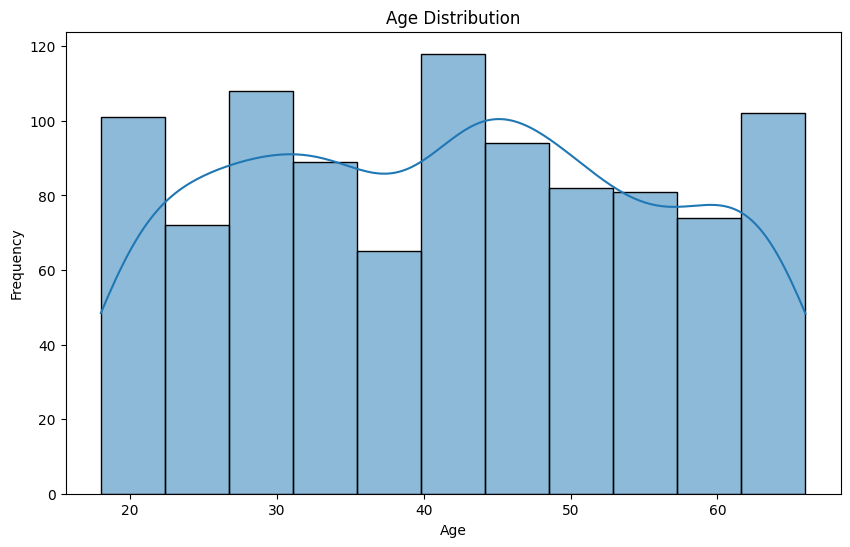

In [14]:
# 7. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

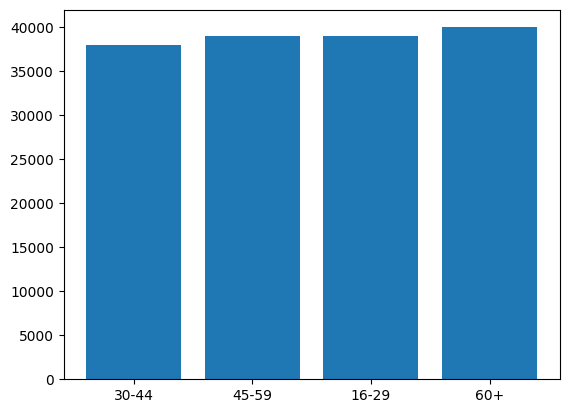

In [15]:
df['age_group'] = pd.cut(df['Age'] ,bins = [16,30,45,60,75], labels = ['16-29', '30-44','45-59', '60+'])


plt.bar(df['age_group'], df['PremiumPrice'])
plt.show()


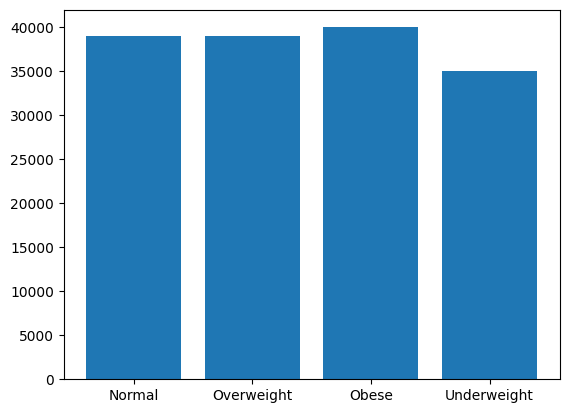

In [16]:
df['BMI Groups'] = pd.cut(df['BMI'] , bins = [0, 18.5, 25,30,100] , labels= ['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.bar(df['BMI Groups'], df['PremiumPrice'])
plt.show()


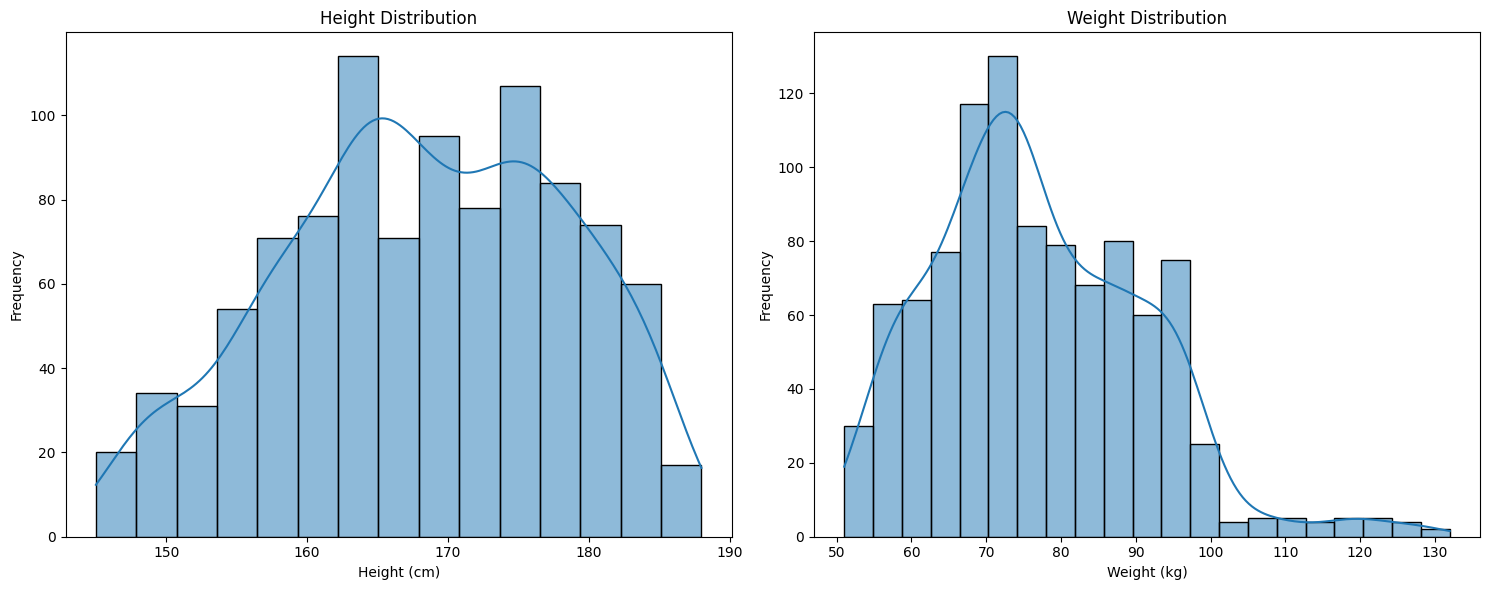

In [17]:
# 8. Height and Weight Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df['Height'], kde=True, ax=axes[0])
axes[0].set_title('Height Distribution')
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Frequency')

sns.histplot(df['Weight'], kde=True, ax=axes[1])
axes[1].set_title('Weight Distribution')
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

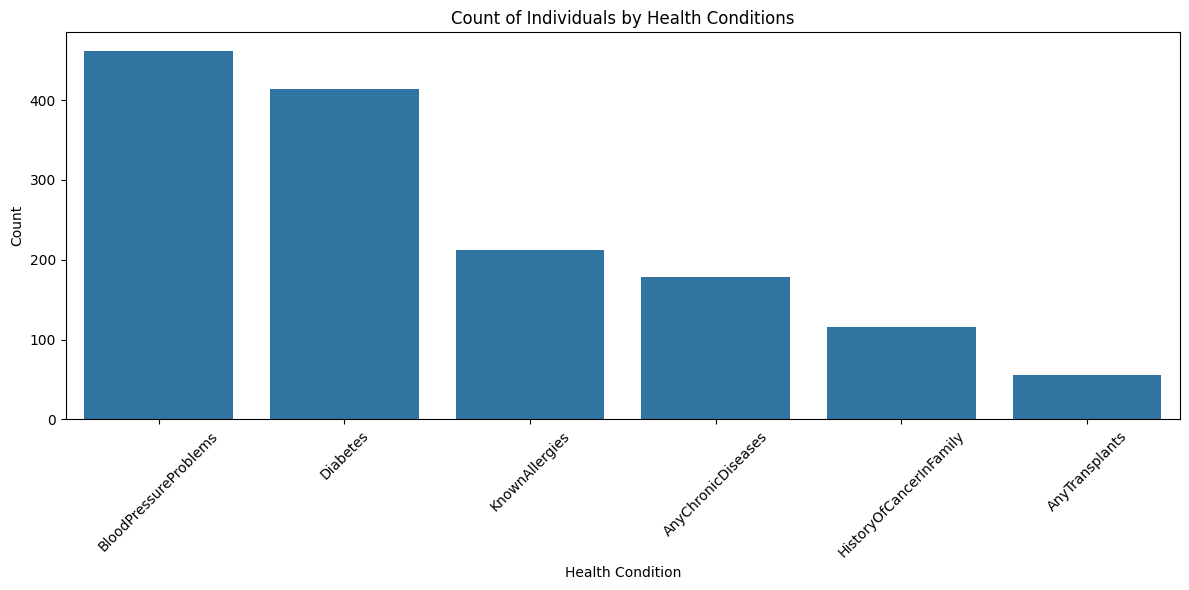

In [18]:
# 9. Count of individuals by health conditions
plt.figure(figsize=(12, 6))
health_counts = df[health_conditions].sum().sort_values(ascending=False)
sns.barplot(x=health_counts.index, y=health_counts.values)
plt.title('Count of Individuals by Health Conditions')
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
print(df.isna().sum())

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
BMI                        0
age_group                  0
BMI Groups                 0
dtype: int64


In [20]:
#removing unnecessary columns
df = df.drop(['age_group', 'BMI Groups'], axis=1)

In [21]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [22]:
correlation = df.corr(numeric_only='True')['PremiumPrice'].sort_values(ascending=True)
correlation

,PremiumPrice
KnownAllergies,0.012103
Height,0.026910
Diabetes,0.076209
HistoryOfCancerInFamily,0.083139
BMI,0.103812
Weight,0.141507
BloodPressureProblems,0.167097
AnyChronicDiseases,0.208610
NumberOfMajorSurgeries,0.264250
AnyTransplants,0.289056


In [23]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [24]:
# 1. Hypothesis: Premium costs are significantly different based on diabetes status
diabetes_yes = df[df['Diabetes'] == 1]['PremiumPrice']
diabetes_no = df[df['Diabetes'] == 0]['PremiumPrice']

t_stat, p_value = stats.ttest_ind(diabetes_yes, diabetes_no, equal_var=False)
result = f"T-test for Premium Price difference by Diabetes Status:\n"
result += f"t-statistic: {t_stat:.4f}\n"
result += f"p-value: {p_value:.4f}\n"
result += f"Mean premium for people with diabetes: ${diabetes_yes.mean():.2f}\n"
result += f"Mean premium for people without diabetes: ${diabetes_no.mean():.2f}\n"
result += f"Conclusion: {'There is a significant difference in premium prices based on diabetes status' if p_value < 0.05 else 'There is no significant difference in premium prices based on diabetes status'}"

In [25]:
result

'T-test for Premium Price difference by Diabetes Status:\nt-statistic: 2.4489\np-value: 0.0145\nMean premium for people with diabetes: $24896.14\nMean premium for people without diabetes: $23931.82\nConclusion: There is a significant difference in premium prices based on diabetes status'

In [26]:
# 2. Hypothesis: Premium costs are significantly different based on chronic disease status
chronic_yes = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']
chronic_no = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']

t_stat, p_value = stats.ttest_ind(chronic_yes, chronic_no, equal_var=False)
result = f"T-test for Premium Price difference by Chronic Disease Status:\n"
result += f"t-statistic: {t_stat:.4f}\n"
result += f"p-value: {p_value:.4f}\n"
result += f"Mean premium for people with chronic diseases: ${chronic_yes.mean():.2f}\n"
result += f"Mean premium for people without chronic diseases: ${chronic_no.mean():.2f}\n"
result += f"Conclusion: {'There is a significant difference in premium prices based on chronic disease status' if p_value < 0.05 else 'There is no significant difference in premium prices based on chronic disease status'}"

In [27]:
result

'T-test for Premium Price difference by Chronic Disease Status:\nt-statistic: 7.7077\np-value: 0.0000\nMean premium for people with chronic diseases: $27112.36\nMean premium for people without chronic diseases: $23725.25\nConclusion: There is a significant difference in premium prices based on chronic disease status'

In [28]:
# 3. Hypothesis: Premium costs differ significantly based on the number of major surgeries
# ANOVA test
surgery_groups = [df[df['NumberOfMajorSurgeries'] == i]['PremiumPrice'] for i in range(4)]  # 0 to 3 surgeries
f_stat, p_value = stats.f_oneway(*surgery_groups)

result = f"ANOVA test for Premium Price difference by Number of Major Surgeries:\n"
result += f"F-statistic: {f_stat:.4f}\n"
result += f"p-value: {p_value:.4f}\n"

for i in range(4):
    if len(surgery_groups[i]) > 0:  # Check if the group has any data
        result += f"Mean premium for people with {i} surgeries: ${surgery_groups[i].mean():.2f} (n={len(surgery_groups[i])})\n"
    else:
        result += f"No data for people with {i} surgeries\n"

result += f"Conclusion: {'There is a significant difference in premium prices based on the number of major surgeries' if p_value < 0.05 else 'There is no significant difference in premium prices based on the number of major surgeries'}"


In [29]:
result

'ANOVA test for Premium Price difference by Number of Major Surgeries:\nF-statistic: 26.1354\np-value: 0.0000\nMean premium for people with 0 surgeries: $22968.68 (n=479)\nMean premium for people with 1 surgeries: $24741.94 (n=372)\nMean premium for people with 2 surgeries: $28084.03 (n=119)\nMean premium for people with 3 surgeries: $28000.00 (n=16)\nConclusion: There is a significant difference in premium prices based on the number of major surgeries'

In [30]:
# 4. Hypothesis: Age is a significant predictor of premium price
# Linear regression
X = sm.add_constant(df['Age'])
y = df['PremiumPrice']
model = sm.OLS(y, X).fit()

result = f"Linear Regression: Premium Price vs Age\n"
result += f"R-squared: {model.rsquared:.4f}\n"
result += f"p-value: {model.f_pvalue:.4f}\n"
result += f"Coefficient for Age: {model.params['Age']:.4f}\n"
result += f"Intercept: {model.params['const']:.4f}\n"
result += f"Conclusion: {'Age is a significant predictor of premium price' if model.f_pvalue < 0.05 else 'Age is not a significant predictor of premium price'}"


In [31]:
result

'Linear Regression: Premium Price vs Age\nR-squared: 0.4866\np-value: 0.0000\nCoefficient for Age: 312.1279\nIntercept: 11306.7971\nConclusion: Age is a significant predictor of premium price'

In [32]:
# 5. Hypothesis: BMI is a significant predictor of premium price
X = sm.add_constant(df['BMI'])
y = df['PremiumPrice']
model = sm.OLS(y, X).fit()

result = f"Linear Regression: Premium Price vs BMI\n"
result += f"R-squared: {model.rsquared:.4f}\n"
result += f"p-value: {model.f_pvalue:.4f}\n"
result += f"Coefficient for BMI: {model.params['BMI']:.4f}\n"
result += f"Intercept: {model.params['const']:.4f}\n"
result += f"Conclusion: {'BMI is a significant predictor of premium price' if model.f_pvalue < 0.05 else 'BMI is not a significant predictor of premium price'}"


In [33]:
result

'Linear Regression: Premium Price vs BMI\nR-squared: 0.0108\np-value: 0.0011\nCoefficient for BMI: 110.3370\nIntercept: 21306.7820\nConclusion: BMI is a significant predictor of premium price'

In [34]:
# 6. Hypothesis: Multiple factors together significantly predict premium price
# Multiple linear regression
formula = 'PremiumPrice ~ Age + Diabetes + BloodPressureProblems + AnyTransplants + AnyChronicDiseases + BMI + KnownAllergies + HistoryOfCancerInFamily + NumberOfMajorSurgeries'
model = ols(formula, data=df).fit()

result = f"Multiple Linear Regression: Premium Price vs All Factors\n"
result += f"R-squared: {model.rsquared:.4f}\n"
result += f"Adjusted R-squared: {model.rsquared_adj:.4f}\n"
result += f"p-value: {model.f_pvalue:.4f}\n\n"
result += "Coefficients:\n"

for var in model.params.index:
    result += f"{var}: {model.params[var]:.4f} (p-value: {model.pvalues[var]:.4f})\n"


In [35]:
result

'Multiple Linear Regression: Premium Price vs All Factors\nR-squared: 0.6357\nAdjusted R-squared: 0.6323\np-value: 0.0000\n\nCoefficients:\nIntercept: 5926.8703 (p-value: 0.0000)\nAge: 330.5127 (p-value: 0.0000)\nDiabetes: -440.0969 (p-value: 0.0832)\nBloodPressureProblems: 110.4624 (p-value: 0.6639)\nAnyTransplants: 7819.8668 (p-value: 0.0000)\nAnyChronicDiseases: 2687.3368 (p-value: 0.0000)\nBMI: 142.3228 (p-value: 0.0000)\nKnownAllergies: 306.6917 (p-value: 0.3047)\nHistoryOfCancerInFamily: 2306.6544 (p-value: 0.0000)\nNumberOfMajorSurgeries: -631.5448 (p-value: 0.0008)\n'

In [36]:
# 7. Correlation analysis
correlation_matrix = df.corr()
premium_correlations = correlation_matrix['PremiumPrice'].sort_values(ascending=False)

result = f"Correlation Analysis with Premium Price:\n\n"
for var, corr in premium_correlations.items():
    if var != 'PremiumPrice':
        result += f"{var}: {corr:.4f}\n"

In [37]:
result

'Correlation Analysis with Premium Price:\n\nAge: 0.6975\nAnyTransplants: 0.2891\nNumberOfMajorSurgeries: 0.2642\nAnyChronicDiseases: 0.2086\nBloodPressureProblems: 0.1671\nWeight: 0.1415\nBMI: 0.1038\nHistoryOfCancerInFamily: 0.0831\nDiabetes: 0.0762\nHeight: 0.0269\nKnownAllergies: 0.0121\n'

In [38]:
# Prepare features and target
X = df.drop('PremiumPrice', axis=1)
y = df['PremiumPrice']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test, scaled=False):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())

    # Save results
    results = {
        'Model': model_name,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'CV RMSE': cv_rmse
    }

    # Create visualization of actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred_test, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel('Actual Premium Price')
    plt.ylabel('Predicted Premium Price')
    plt.title(f'{model_name}: Actual vs Predicted')


    # If it's a tree-based model, visualize feature importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'Feature': X_train.columns if not scaled else [f'Feature_{i}' for i in range(X_train.shape[1])],
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)

        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title(f'{model_name}: Feature Importance')
        plt.tight_layout()
        plt.show()
    return results

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
model

In [46]:
models.items()

dict_items([('Linear Regression', LinearRegression()), ('Ridge Regression', Ridge()), ('Lasso Regression', Lasso()), ('Decision Tree', DecisionTreeRegressor(random_state=42)), ('Random Forest', RandomForestRegressor(random_state=42)), ('Gradient Boosting', GradientBoostingRegressor(random_state=42))])

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training Decision Tree...


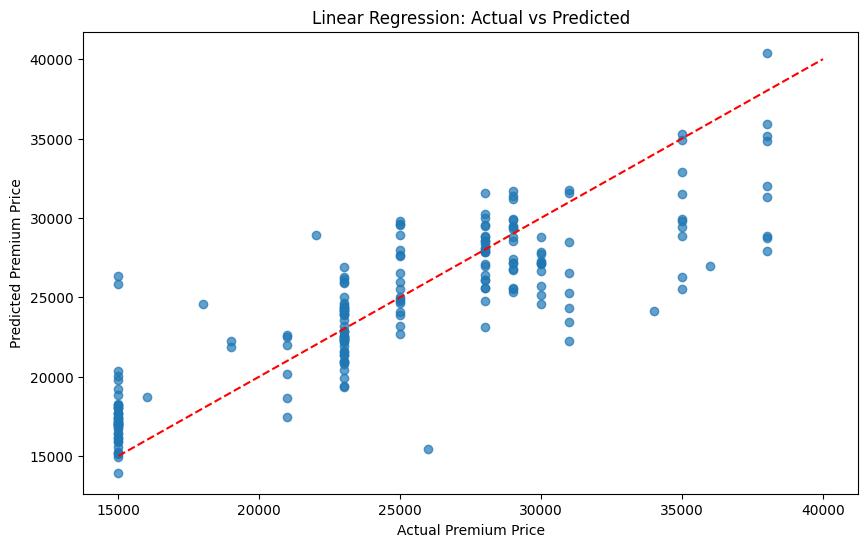

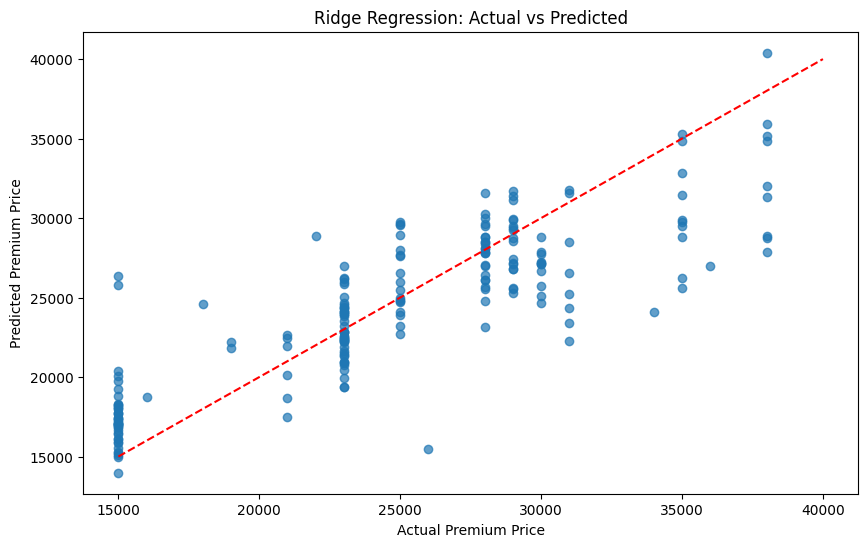

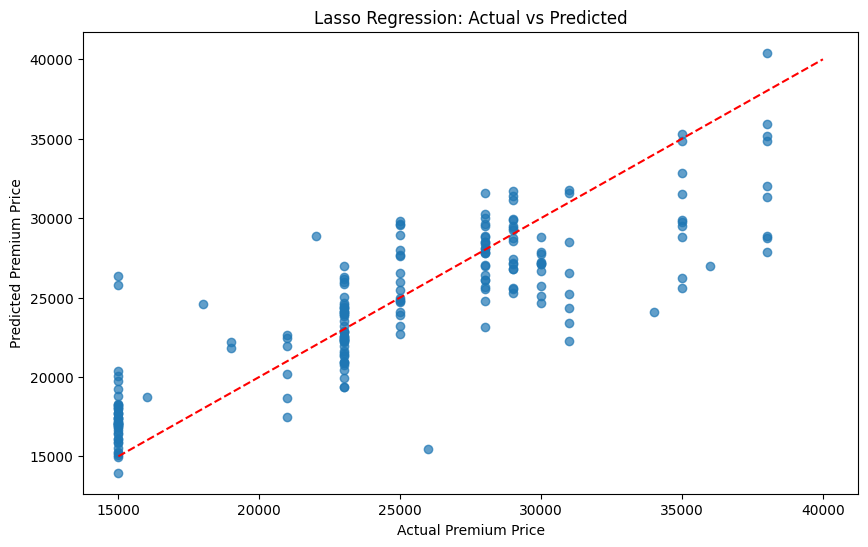

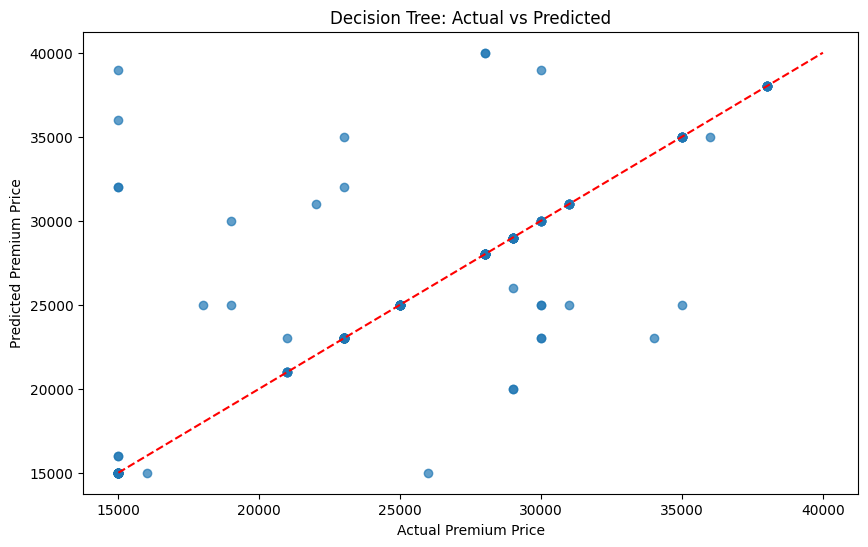

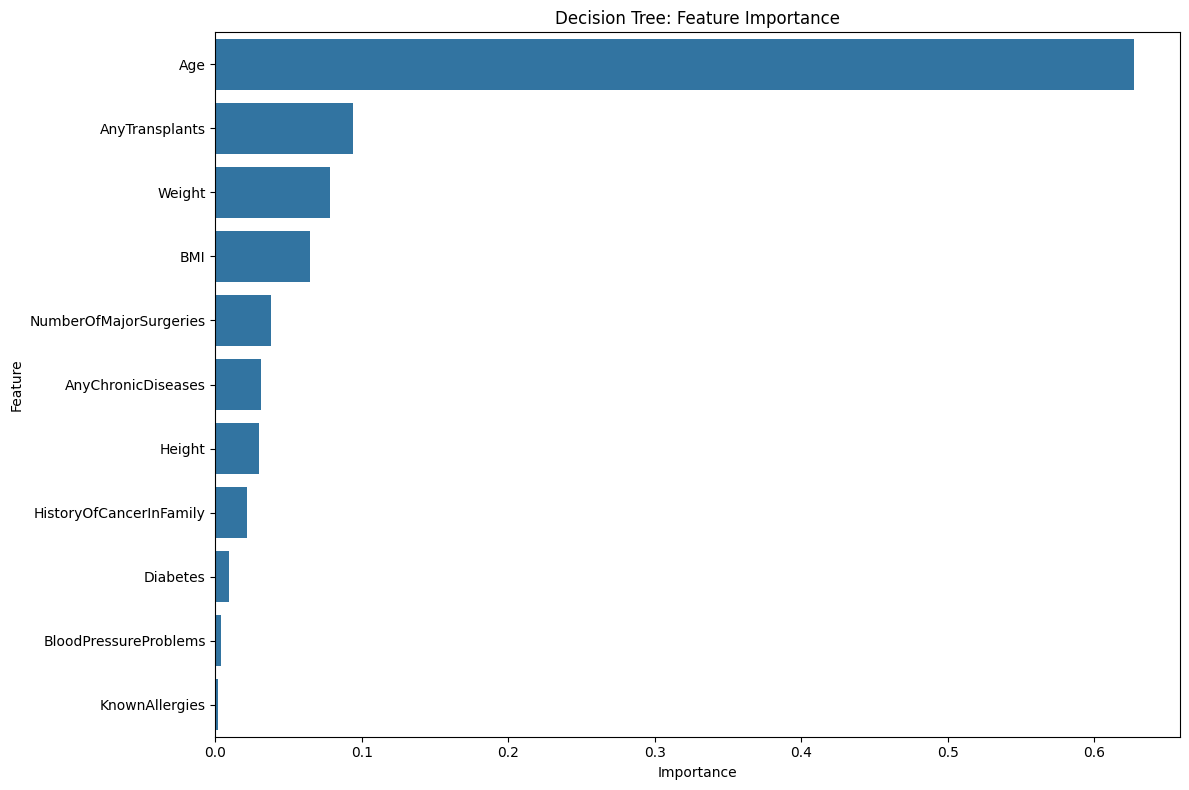

Training Random Forest...


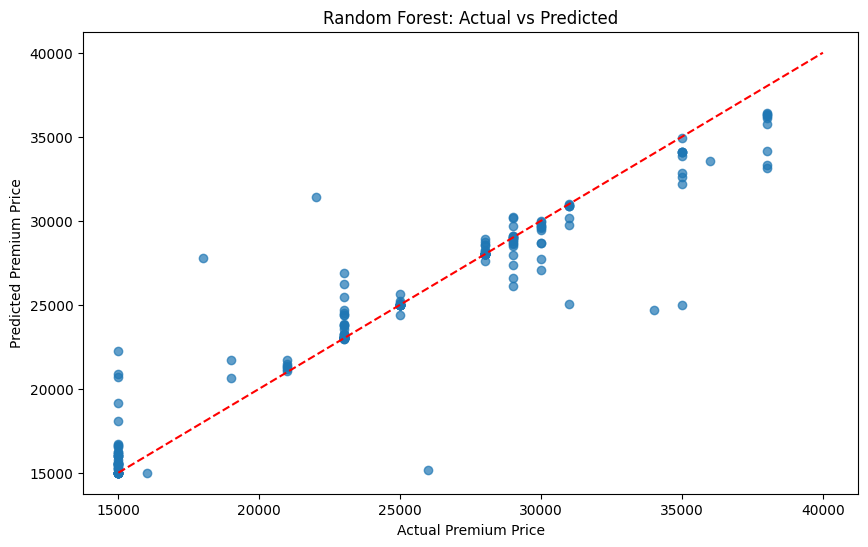

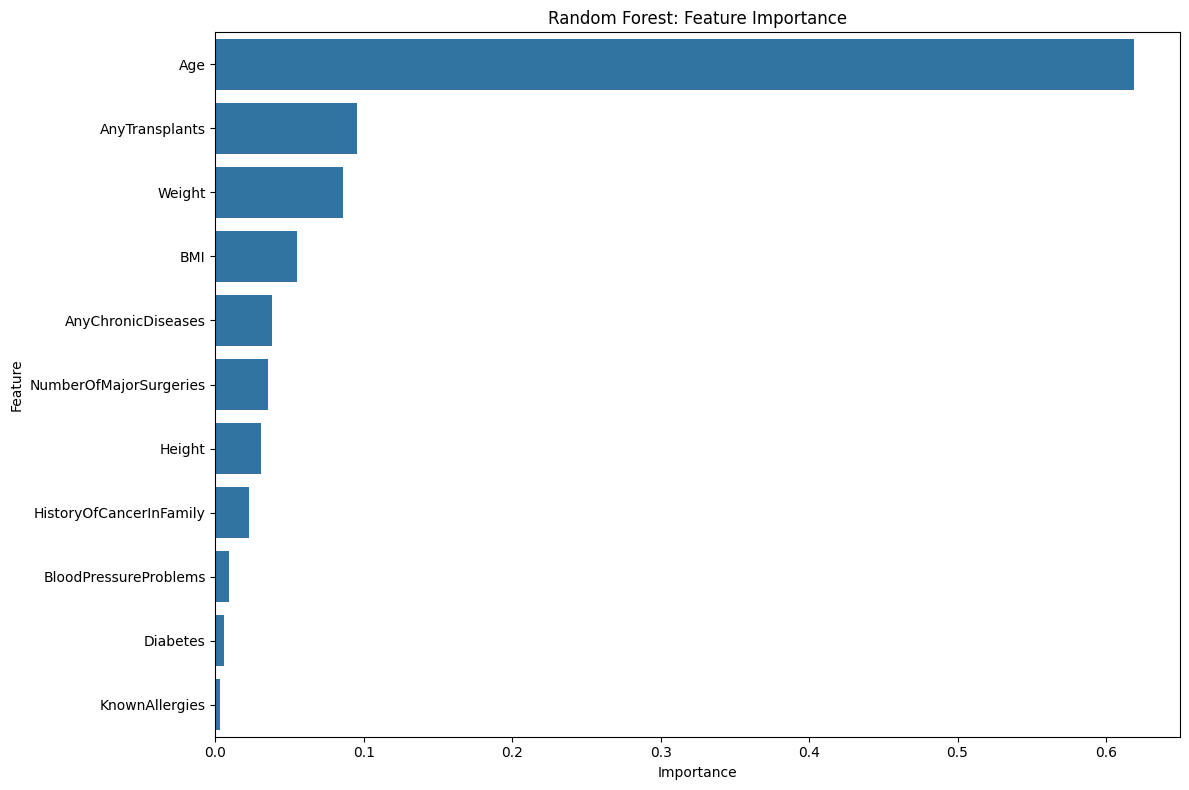

Training Gradient Boosting...


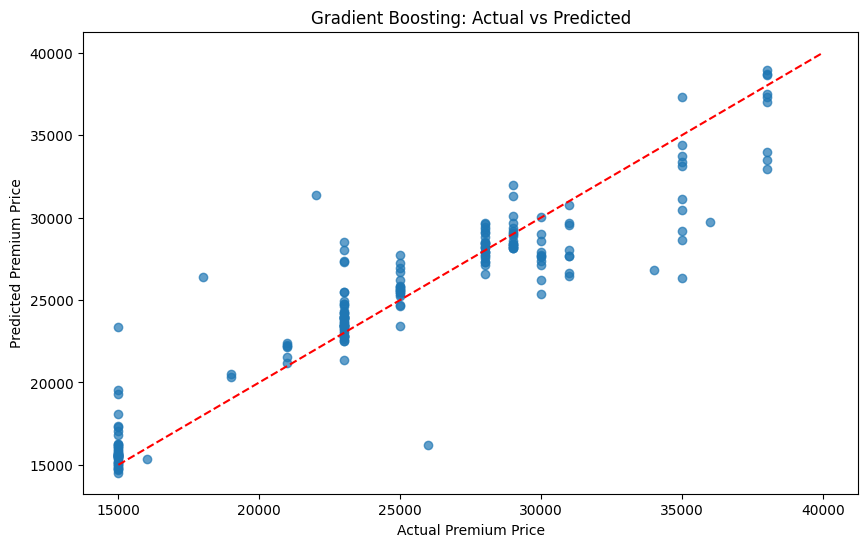

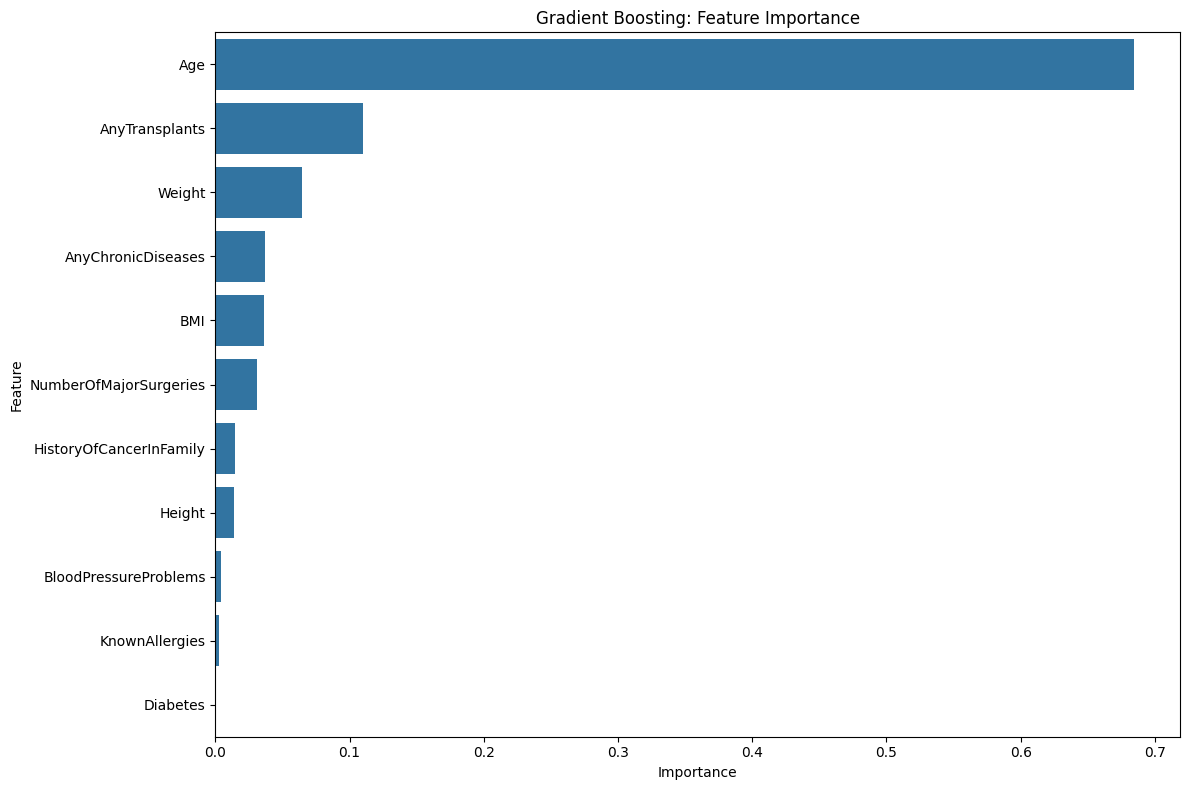

In [47]:
# Evaluate all models
results = []
for name, model in models.items():
    print(f"Training {name}...")
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        # Use scaled data for linear models
        result = evaluate_model(model, name, X_train_scaled, X_test_scaled, y_train, y_test, scaled=True)
    else:
        # Use original data for tree-based models
        result = evaluate_model(model, name, X_train, X_test, y_train, y_test)
    results.append(result)

In [48]:
results

[{'Model': 'Linear Regression',
  'Train RMSE': np.float64(3792.616532679427),
  'Test RMSE': np.float64(3494.4137981898157),
  'Train MAE': 2694.1274942528685,
  'Test MAE': 2586.1817100200624,
  'Train R²': 0.6220932125044117,
  'Test R²': 0.713646143964974,
  'CV RMSE': np.float64(3889.8590276502105)},
 {'Model': 'Ridge Regression',
  'Train RMSE': np.float64(3792.694333400631),
  'Test RMSE': np.float64(3495.671624988427),
  'Train MAE': 2693.9145465832,
  'Test MAE': 2587.217767040415,
  'Train R²': 0.622077707787851,
  'Test R²': 0.713439958664953,
  'CV RMSE': np.float64(3889.6822052178914)},
 {'Model': 'Lasso Regression',
  'Train RMSE': np.float64(3792.685335275214),
  'Test RMSE': np.float64(3495.1707387767233),
  'Train MAE': 2693.443808935338,
  'Test MAE': 2586.5714853285867,
  'Train R²': 0.6220795010186522,
  'Test R²': 0.7135220737521876,
  'CV RMSE': np.float64(3889.5756229675976)},
 {'Model': 'Decision Tree',
  'Train RMSE': np.float64(0.0),
  'Test RMSE': np.float64(

In [49]:
# Convert results to DataFrame and save
results_df = pd.DataFrame(results)

In [50]:
results_df

,Model,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²,CV RMSE
0,Linear Regression,3792.616533,3494.413798,2694.127494,2586.181710,0.622093,0.713646,3889.859028
1,Ridge Regression,3792.694333,3495.671625,2693.914547,2587.217767,0.622078,0.713440,3889.682205
2,Lasso Regression,3792.685335,3495.170739,2693.443809,2586.571485,0.622080,0.713522,3889.575623
3,Decision Tree,0.000000,4008.198668,0.000000,1287.878788,1.000000,0.623250,4358.223758
4,Random Forest,1116.053769,2135.170729,464.860406,1010.353535,0.967275,0.893090,3196.140883
5,Gradient Boosting,2030.018212,2382.753898,1177.824722,1522.153969,0.891730,0.866859,3317.417589


In [51]:
# Hyperparameter tuning for the best model (assuming Random Forest or Gradient Boosting)
best_model_name = results_df.loc[results_df['Test R²'].idxmax()]['Model']
print(f"\nPerforming hyperparameter tuning for {best_model_name}...")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = RandomForestRegressor(random_state=42)
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
    model = GradientBoostingRegressor(random_state=42)
else:
    # Default to Random Forest if best model is something else
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30]
    }
    model = RandomForestRegressor(random_state=42)
    best_model_name = 'Random Forest'


Performing hyperparameter tuning for Random Forest...


In [52]:
from sklearn.model_selection import GridSearchCV

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [53]:
pickle.dump(model, open("insurance_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
